In [1]:
from loss import JDAMLoss
from model.sde import VESDE
from model.ddpm import DDPM
from data.data import load_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
unet = DDPM(activation=tf.keras.activations.swish)
sde = VESDE(
    pet_score_func=lambda x, t: unet(x, t),
    mri_score_func=lambda x, t: unet(x, t)
)

In [3]:
data = load_data()

In [4]:
mri, pet = data[:1, :, :, :1], data[:1, :, :, 1:2]
mri = tf.cast(mri, dtype=tf.float32)
pet = tf.cast(pet, dtype=tf.float32)

In [ ]:
lk = JDAMLoss(sde)
losses = []
scores = []
for i in range(1, 7):
    t = tf.convert_to_tensor([i/10], dtype=tf.float32)
    l, score = lk.compute_loss(unet, pet, mri, t)
    losses.append((t, l))
    scores.append((t, score))
    print("t: ", t.numpy(), "loss: ", l.numpy(), "score_min: ", score.numpy().min(), "sc_max: ", score.numpy().max())

t:  [0.1] sigma_t:  [0.09672979]
t:  [0.1] loss:  0.058758993 score_min:  -0.060718976 sc_max:  0.069677554
t:  [0.2] sigma_t:  [0.22670297]
t:  [0.2] loss:  0.059617877 score_min:  -0.040580496 sc_max:  0.084694356
t:  [0.3] sigma_t:  [0.5313177]
t:  [0.3] loss:  0.05984692 score_min:  -0.03503092 sc_max:  0.06501357
t:  [0.4] sigma_t:  [1.2452348]
t:  [0.4] loss:  0.060842074 score_min:  -0.086804375 sc_max:  0.045920692
t:  [0.5] sigma_t:  [2.9184232]
t:  [0.5] loss:  0.06025673 score_min:  -0.05112932 sc_max:  0.05548771
t:  [0.6] sigma_t:  [6.8398304]
t:  [0.6] loss:  0.11448879 score_min:  -0.13872752 sc_max:  0.07518918
t:  [0.7] sigma_t:  [16.030321]
t:  [0.7] loss:  0.23355202 score_min:  -0.099069625 sc_max:  0.073895626
t:  [0.8] sigma_t:  [37.569836]
t:  [0.8] loss:  0.964853 score_min:  -0.099983454 sc_max:  0.08473025
t:  [0.9] sigma_t:  [88.05138]
t:  [0.9] loss:  5.2616024 score_min:  -0.09893721 sc_max:  0.09880264
t:  [1.] sigma_t:  [206.36368]
t:  [1.] loss:  37.1194

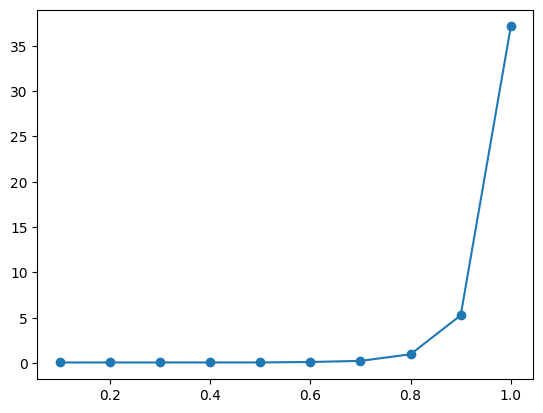

In [7]:
ts, ls = zip(*losses)
plt.plot(ts, ls, marker='o')

In [15]:
def plot_images(pet_noisy, i):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(pet[0, :, :, 0], cmap='gray')
    axes[0].set_title("Original PET")
    axes[0].axis("off")
    
    axes[1].imshow(pet_noisy[0, :, :, 0], cmap='gray')
    axes[1].set_title(f"Noisy PET ({i*10}%)")
    axes[1].axis("off")
    
    plt.show()

In [ ]:
# for i in range(1, 11):
#     t = tf.convert_to_tensor([i/10], dtype=tf.float32)
#     _, noise = sde.marginal_probability(pet, t)
#     z = tf.random.normal(tf.shape(pet))
#     pet_noisy_2 =  noise * z
#     plot_images(pet_noisy_2, i)

In [1]:
import train

In [2]:
train.train()

Epoch 1/100: 100%|██████████| 1/1 [00:06<00:00,  6.97s/batch, loss=tf.Tensor(0.058773022, shape=(), dtype=float32)]


Epoch 1/100, Mean Loss: 0.05877, Time: 6.96s
epoch:  0  weights:  [-0.01947985  0.06790557  0.01428518 -0.03829757  0.03383302]


Epoch 2/100: 100%|██████████| 1/1 [00:05<00:00,  5.92s/batch, loss=tf.Tensor(0.058742575, shape=(), dtype=float32)]


Epoch 2/100, Mean Loss: 0.05874, Time: 5.92s
epoch:  1  weights:  [-0.01949859  0.06829029  0.01443946 -0.03828097  0.0338449 ]


Epoch 3/100: 100%|██████████| 1/1 [00:06<00:00,  6.12s/batch, loss=tf.Tensor(0.06404718, shape=(), dtype=float32)]


Epoch 3/100, Mean Loss: 0.06405, Time: 6.12s
epoch:  2  weights:  [-0.01964651  0.06830063  0.01468839 -0.03852224  0.03380978]


Epoch 4/100: 100%|██████████| 1/1 [00:06<00:00,  6.73s/batch, loss=tf.Tensor(0.07597921, shape=(), dtype=float32)]


Epoch 4/100, Mean Loss: 0.07598, Time: 6.73s
epoch:  3  weights:  [-0.01931643  0.06871611  0.01429    -0.0388377   0.03364991]


Epoch 5/100: 100%|██████████| 1/1 [00:05<00:00,  5.68s/batch, loss=tf.Tensor(0.06712512, shape=(), dtype=float32)]


Epoch 5/100, Mean Loss: 0.06713, Time: 5.68s
epoch:  4  weights:  [-0.01882453  0.06916378  0.01407002 -0.03930305  0.03343552]


Epoch 6/100: 100%|██████████| 1/1 [00:06<00:00,  6.27s/batch, loss=tf.Tensor(0.06360434, shape=(), dtype=float32)]


Epoch 6/100, Mean Loss: 0.06360, Time: 6.27s
epoch:  5  weights:  [-0.01846464  0.06965216  0.01386048 -0.03965749  0.03326039]


Epoch 7/100: 100%|██████████| 1/1 [00:05<00:00,  5.61s/batch, loss=tf.Tensor(0.06958448, shape=(), dtype=float32)]


Epoch 7/100, Mean Loss: 0.06958, Time: 5.61s
epoch:  6  weights:  [-0.01852769  0.06979567  0.01393815 -0.03964738  0.03321959]


Epoch 8/100: 100%|██████████| 1/1 [00:05<00:00,  5.49s/batch, loss=tf.Tensor(0.114658296, shape=(), dtype=float32)]


Epoch 8/100, Mean Loss: 0.11466, Time: 5.49s
epoch:  7  weights:  [-0.01874967  0.07029184  0.01348839 -0.03958183  0.0330206 ]


Epoch 9/100: 100%|██████████| 1/1 [00:05<00:00,  5.94s/batch, loss=tf.Tensor(0.07815666, shape=(), dtype=float32)]


Epoch 9/100, Mean Loss: 0.07816, Time: 5.94s
epoch:  8  weights:  [-0.01904604  0.07076956  0.01307426 -0.03938311  0.03287896]


Epoch 10/100: 100%|██████████| 1/1 [00:05<00:00,  5.43s/batch, loss=tf.Tensor(0.16020326, shape=(), dtype=float32)]


Epoch 10/100, Mean Loss: 0.16020, Time: 5.43s
epoch:  9  weights:  [-0.01901099  0.07108209  0.01271574 -0.03931602  0.0327426 ]


Epoch 11/100: 100%|██████████| 1/1 [00:05<00:00,  5.85s/batch, loss=tf.Tensor(0.07753872, shape=(), dtype=float32)]


Epoch 11/100, Mean Loss: 0.07754, Time: 5.85s
epoch:  10  weights:  [-0.01903069  0.07140034  0.01238314 -0.03909377  0.03258748]


Epoch 12/100: 100%|██████████| 1/1 [00:05<00:00,  5.57s/batch, loss=tf.Tensor(0.08128117, shape=(), dtype=float32)]


Epoch 12/100, Mean Loss: 0.08128, Time: 5.57s
epoch:  11  weights:  [-0.0191631   0.07171007  0.01206839 -0.03887551  0.03244437]


Epoch 13/100: 100%|██████████| 1/1 [00:05<00:00,  5.57s/batch, loss=tf.Tensor(0.10812503, shape=(), dtype=float32)]


Epoch 13/100, Mean Loss: 0.10813, Time: 5.57s
epoch:  12  weights:  [-0.01928888  0.07202346  0.01181288 -0.03845391  0.03220422]


Epoch 14/100: 100%|██████████| 1/1 [00:05<00:00,  5.75s/batch, loss=tf.Tensor(0.105971776, shape=(), dtype=float32)]


Epoch 14/100, Mean Loss: 0.10597, Time: 5.75s
epoch:  13  weights:  [-0.01902528  0.07234395  0.01162566 -0.03786863  0.03188147]


Epoch 15/100: 100%|██████████| 1/1 [00:05<00:00,  5.52s/batch, loss=tf.Tensor(0.06791006, shape=(), dtype=float32)]


Epoch 15/100, Mean Loss: 0.06791, Time: 5.52s
epoch:  14  weights:  [-0.01877384  0.07265359  0.01145523 -0.03726955  0.03155626]


Epoch 16/100: 100%|██████████| 1/1 [00:06<00:00,  6.28s/batch, loss=tf.Tensor(0.11819871, shape=(), dtype=float32)]


Epoch 16/100, Mean Loss: 0.11820, Time: 6.28s
epoch:  15  weights:  [-0.01864152  0.07292183  0.01130152 -0.03678076  0.03125206]


Epoch 17/100: 100%|██████████| 1/1 [00:05<00:00,  5.81s/batch, loss=tf.Tensor(0.08085803, shape=(), dtype=float32)]


Epoch 17/100, Mean Loss: 0.08086, Time: 5.81s
epoch:  16  weights:  [-0.01865396  0.0732388   0.01112262 -0.0362436   0.03089272]


Epoch 18/100: 100%|██████████| 1/1 [00:05<00:00,  5.76s/batch, loss=tf.Tensor(0.10413542, shape=(), dtype=float32)]


Epoch 18/100, Mean Loss: 0.10414, Time: 5.76s
epoch:  17  weights:  [-0.0187047   0.07351886  0.01095435 -0.0358571   0.03059244]


Epoch 19/100: 100%|██████████| 1/1 [00:06<00:00,  6.49s/batch, loss=tf.Tensor(0.11438991, shape=(), dtype=float32)]


Epoch 19/100, Mean Loss: 0.11439, Time: 6.49s
epoch:  18  weights:  [-0.01885363  0.07384225  0.01075028 -0.03555752  0.03028454]


Epoch 20/100: 100%|██████████| 1/1 [00:06<00:00,  6.77s/batch, loss=tf.Tensor(0.061034314, shape=(), dtype=float32)]


Epoch 20/100, Mean Loss: 0.06103, Time: 6.77s
epoch:  19  weights:  [-0.01898474  0.07414214  0.01056437 -0.0352752   0.03000119]


Epoch 21/100: 100%|██████████| 1/1 [00:06<00:00,  6.15s/batch, loss=tf.Tensor(0.06683494, shape=(), dtype=float32)]


Epoch 21/100, Mean Loss: 0.06683, Time: 6.15s
epoch:  20  weights:  [-0.01908137  0.07442553  0.01040282 -0.03499486  0.029741  ]


Epoch 22/100: 100%|██████████| 1/1 [00:06<00:00,  6.30s/batch, loss=tf.Tensor(0.19588616, shape=(), dtype=float32)]


Epoch 22/100, Mean Loss: 0.19589, Time: 6.30s
epoch:  21  weights:  [-0.018902    0.07469124  0.01040065 -0.03455512  0.02952827]


Epoch 23/100: 100%|██████████| 1/1 [00:05<00:00,  5.76s/batch, loss=tf.Tensor(0.23417267, shape=(), dtype=float32)]


Epoch 23/100, Mean Loss: 0.23417, Time: 5.76s
epoch:  22  weights:  [-0.01884612  0.07484665  0.01036165 -0.03436046  0.02935971]


Epoch 24/100: 100%|██████████| 1/1 [00:05<00:00,  5.94s/batch, loss=tf.Tensor(0.08283965, shape=(), dtype=float32)]


Epoch 24/100, Mean Loss: 0.08284, Time: 5.94s
epoch:  23  weights:  [-0.01880363  0.07499814  0.01032187 -0.03417791  0.02920357]


Epoch 25/100: 100%|██████████| 1/1 [00:05<00:00,  5.55s/batch, loss=tf.Tensor(0.072155334, shape=(), dtype=float32)]


Epoch 25/100, Mean Loss: 0.07216, Time: 5.55s
epoch:  24  weights:  [-0.01878913  0.07512901  0.01027598 -0.03405342  0.02906298]


Epoch 26/100: 100%|██████████| 1/1 [00:05<00:00,  5.86s/batch, loss=tf.Tensor(0.06661725, shape=(), dtype=float32)]


Epoch 26/100, Mean Loss: 0.06662, Time: 5.86s
epoch:  25  weights:  [-0.01878539  0.07525635  0.01022937 -0.03394686  0.02893433]


Epoch 27/100: 100%|██████████| 1/1 [00:05<00:00,  5.78s/batch, loss=tf.Tensor(0.07906467, shape=(), dtype=float32)]


Epoch 27/100, Mean Loss: 0.07906, Time: 5.78s
epoch:  26  weights:  [-0.01875914  0.07533098  0.01020593 -0.03382934  0.0288178 ]


Epoch 28/100: 100%|██████████| 1/1 [00:05<00:00,  5.77s/batch, loss=tf.Tensor(0.15379697, shape=(), dtype=float32)]


Epoch 28/100, Mean Loss: 0.15380, Time: 5.77s
epoch:  27  weights:  [-0.01877986  0.07557348  0.01011894 -0.0337382   0.02871851]


Epoch 29/100: 100%|██████████| 1/1 [00:05<00:00,  5.67s/batch, loss=tf.Tensor(0.108524695, shape=(), dtype=float32)]


Epoch 29/100, Mean Loss: 0.10852, Time: 5.67s
epoch:  28  weights:  [-0.01881883  0.0757485   0.0100444  -0.03370519  0.02862318]


Epoch 30/100: 100%|██████████| 1/1 [00:05<00:00,  5.80s/batch, loss=tf.Tensor(0.0784205, shape=(), dtype=float32)]


Epoch 30/100, Mean Loss: 0.07842, Time: 5.80s
epoch:  29  weights:  [-0.01884614  0.07588623  0.00998588 -0.03366612  0.02853381]


Epoch 31/100: 100%|██████████| 1/1 [00:05<00:00,  5.78s/batch, loss=tf.Tensor(0.121720605, shape=(), dtype=float32)]


Epoch 31/100, Mean Loss: 0.12172, Time: 5.78s
epoch:  30  weights:  [-0.01887349  0.07601534  0.00993223 -0.03362944  0.02845356]


Epoch 32/100: 100%|██████████| 1/1 [00:05<00:00,  5.83s/batch, loss=tf.Tensor(0.07603191, shape=(), dtype=float32)]


Epoch 32/100, Mean Loss: 0.07603, Time: 5.83s
epoch:  31  weights:  [-0.01889475  0.07614333  0.00988224 -0.03358483  0.02838336]


Epoch 33/100: 100%|██████████| 1/1 [00:05<00:00,  5.72s/batch, loss=tf.Tensor(0.09153835, shape=(), dtype=float32)]


Epoch 33/100, Mean Loss: 0.09154, Time: 5.72s
epoch:  32  weights:  [-0.01891617  0.07624935  0.00983815 -0.03354967  0.02831631]


Epoch 34/100: 100%|██████████| 1/1 [00:05<00:00,  5.86s/batch, loss=tf.Tensor(0.075905204, shape=(), dtype=float32)]


Epoch 34/100, Mean Loss: 0.07591, Time: 5.86s
epoch:  33  weights:  [-0.01895025  0.07638724  0.00978192 -0.03353251  0.02826563]


Epoch 35/100: 100%|██████████| 1/1 [00:05<00:00,  5.69s/batch, loss=tf.Tensor(0.10519102, shape=(), dtype=float32)]


Epoch 35/100, Mean Loss: 0.10519, Time: 5.69s
epoch:  34  weights:  [-0.01899253  0.07658917  0.00970661 -0.03351886  0.02824309]


Epoch 36/100: 100%|██████████| 1/1 [00:05<00:00,  5.90s/batch, loss=tf.Tensor(0.12229661, shape=(), dtype=float32)]


Epoch 36/100, Mean Loss: 0.12230, Time: 5.90s
epoch:  35  weights:  [-0.01904809  0.0768818   0.009604   -0.03350474  0.02825631]


Epoch 37/100: 100%|██████████| 1/1 [00:05<00:00,  5.69s/batch, loss=tf.Tensor(0.44680274, shape=(), dtype=float32)]


Epoch 37/100, Mean Loss: 0.44680, Time: 5.69s
epoch:  36  weights:  [-0.01910104  0.07708306  0.00952573 -0.03352054  0.02824736]


Epoch 38/100: 100%|██████████| 1/1 [00:05<00:00,  5.95s/batch, loss=tf.Tensor(0.1595118, shape=(), dtype=float32)]


Epoch 38/100, Mean Loss: 0.15951, Time: 5.95s
epoch:  37  weights:  [-0.01919192  0.07738164  0.0094083  -0.03357787  0.02826795]


Epoch 39/100: 100%|██████████| 1/1 [00:05<00:00,  5.58s/batch, loss=tf.Tensor(0.1436088, shape=(), dtype=float32)]


Epoch 39/100, Mean Loss: 0.14361, Time: 5.58s
epoch:  38  weights:  [-0.01924939  0.07763788  0.00931566 -0.03357953  0.02828897]


Epoch 40/100: 100%|██████████| 1/1 [00:05<00:00,  5.98s/batch, loss=tf.Tensor(0.118693955, shape=(), dtype=float32)]


Epoch 40/100, Mean Loss: 0.11869, Time: 5.98s
epoch:  39  weights:  [-0.01931227  0.07790972  0.00921818 -0.03358288  0.02831696]


Epoch 41/100: 100%|██████████| 1/1 [00:05<00:00,  5.66s/batch, loss=tf.Tensor(0.080714576, shape=(), dtype=float32)]


Epoch 41/100, Mean Loss: 0.08071, Time: 5.67s
epoch:  40  weights:  [-0.01937614  0.07817359  0.00912252 -0.03359004  0.02834539]


Epoch 42/100: 100%|██████████| 1/1 [00:05<00:00,  5.94s/batch, loss=tf.Tensor(0.0836173, shape=(), dtype=float32)]


Epoch 42/100, Mean Loss: 0.08362, Time: 5.94s
epoch:  41  weights:  [-0.0194343   0.0784058   0.00903759 -0.03360331  0.02836975]


Epoch 43/100: 100%|██████████| 1/1 [00:05<00:00,  5.63s/batch, loss=tf.Tensor(0.07451759, shape=(), dtype=float32)]


Epoch 43/100, Mean Loss: 0.07452, Time: 5.63s
epoch:  42  weights:  [-0.01949037  0.07861855  0.00895889 -0.03362301  0.02839185]


Epoch 44/100: 100%|██████████| 1/1 [00:05<00:00,  5.90s/batch, loss=tf.Tensor(0.07202248, shape=(), dtype=float32)]


Epoch 44/100, Mean Loss: 0.07202, Time: 5.91s
epoch:  43  weights:  [-0.01954201  0.07881646  0.00888586 -0.03363919  0.02841272]


Epoch 45/100: 100%|██████████| 1/1 [00:05<00:00,  5.72s/batch, loss=tf.Tensor(0.08726794, shape=(), dtype=float32)]


Epoch 45/100, Mean Loss: 0.08727, Time: 5.72s
epoch:  44  weights:  [-0.01958781  0.07897992  0.008824   -0.03366867  0.02842858]


Epoch 46/100: 100%|██████████| 1/1 [00:05<00:00,  5.76s/batch, loss=tf.Tensor(0.11218401, shape=(), dtype=float32)]


Epoch 46/100, Mean Loss: 0.11218, Time: 5.76s
epoch:  45  weights:  [-0.01962921  0.0791362   0.00876614 -0.03368298  0.02844407]


Epoch 47/100: 100%|██████████| 1/1 [00:05<00:00,  5.78s/batch, loss=tf.Tensor(0.15493041, shape=(), dtype=float32)]


Epoch 47/100, Mean Loss: 0.15493, Time: 5.78s
epoch:  46  weights:  [-0.01965394  0.07925516  0.00872346 -0.03369447  0.02845618]


Epoch 48/100: 100%|██████████| 1/1 [00:05<00:00,  5.87s/batch, loss=tf.Tensor(0.078255095, shape=(), dtype=float32)]


Epoch 48/100, Mean Loss: 0.07826, Time: 5.87s
epoch:  47  weights:  [-0.01967305  0.07935651  0.00868737 -0.03370171  0.0284666 ]


Epoch 49/100: 100%|██████████| 1/1 [00:06<00:00,  6.19s/batch, loss=tf.Tensor(0.15126985, shape=(), dtype=float32)]


Epoch 49/100, Mean Loss: 0.15127, Time: 6.19s
epoch:  48  weights:  [-0.0196894   0.0794534   0.008654   -0.03369757  0.028477  ]


Epoch 50/100: 100%|██████████| 1/1 [00:05<00:00,  5.73s/batch, loss=tf.Tensor(0.080500156, shape=(), dtype=float32)]


Epoch 50/100, Mean Loss: 0.08050, Time: 5.74s
epoch:  49  weights:  [-0.01970123  0.07953625  0.00862565 -0.03369395  0.02848629]


Epoch 51/100: 100%|██████████| 1/1 [00:06<00:00,  6.08s/batch, loss=tf.Tensor(0.10256061, shape=(), dtype=float32)]


Epoch 51/100, Mean Loss: 0.10256, Time: 6.08s
epoch:  50  weights:  [-0.0197123   0.07960895  0.00860087 -0.03369169  0.02849416]


Epoch 52/100: 100%|██████████| 1/1 [00:06<00:00,  6.36s/batch, loss=tf.Tensor(0.0801269, shape=(), dtype=float32)]


Epoch 52/100, Mean Loss: 0.08013, Time: 6.36s
epoch:  51  weights:  [-0.01972132  0.07967     0.00857996 -0.03369334  0.02850072]


Epoch 53/100: 100%|██████████| 1/1 [00:05<00:00,  5.74s/batch, loss=tf.Tensor(0.21601318, shape=(), dtype=float32)]


Epoch 53/100, Mean Loss: 0.21601, Time: 5.74s
epoch:  52  weights:  [-0.019711    0.07969105  0.00857503 -0.03369831  0.0285045 ]


Epoch 54/100: 100%|██████████| 1/1 [00:05<00:00,  5.61s/batch, loss=tf.Tensor(0.09493118, shape=(), dtype=float32)]


Epoch 54/100, Mean Loss: 0.09493, Time: 5.61s
epoch:  53  weights:  [-0.01970727  0.07972353  0.00856551 -0.03369732  0.02850918]


Epoch 55/100: 100%|██████████| 1/1 [00:05<00:00,  5.67s/batch, loss=tf.Tensor(0.16393806, shape=(), dtype=float32)]


Epoch 55/100, Mean Loss: 0.16394, Time: 5.67s
epoch:  54  weights:  [-0.01968712  0.07974935  0.00856348 -0.03365026  0.02851445]


Epoch 56/100: 100%|██████████| 1/1 [00:05<00:00,  5.88s/batch, loss=tf.Tensor(0.13003902, shape=(), dtype=float32)]


Epoch 56/100, Mean Loss: 0.13004, Time: 5.88s
epoch:  55  weights:  [-0.01968057  0.07979193  0.00855438 -0.0336124   0.02852095]


Epoch 57/100: 100%|██████████| 1/1 [00:05<00:00,  5.47s/batch, loss=tf.Tensor(0.103575386, shape=(), dtype=float32)]


Epoch 57/100, Mean Loss: 0.10358, Time: 5.47s
epoch:  56  weights:  [-0.01966516  0.07981135  0.008554   -0.0335804   0.02852488]


Epoch 58/100: 100%|██████████| 1/1 [00:05<00:00,  5.66s/batch, loss=tf.Tensor(0.076895595, shape=(), dtype=float32)]


Epoch 58/100, Mean Loss: 0.07690, Time: 5.66s
epoch:  57  weights:  [-0.01964526  0.07982878  0.0085551  -0.03353374  0.02852891]


Epoch 59/100: 100%|██████████| 1/1 [00:05<00:00,  5.56s/batch, loss=tf.Tensor(0.1358182, shape=(), dtype=float32)]


Epoch 59/100, Mean Loss: 0.13582, Time: 5.56s
epoch:  58  weights:  [-0.01959941  0.07982902  0.00856631 -0.03343025  0.02853264]


Epoch 60/100: 100%|██████████| 1/1 [00:05<00:00,  5.80s/batch, loss=tf.Tensor(0.13977255, shape=(), dtype=float32)]


Epoch 60/100, Mean Loss: 0.13977, Time: 5.80s
epoch:  59  weights:  [-0.01959526  0.0798649   0.00855699 -0.03340317  0.02853859]


Epoch 61/100: 100%|██████████| 1/1 [00:05<00:00,  5.44s/batch, loss=tf.Tensor(0.07162674, shape=(), dtype=float32)]


Epoch 61/100, Mean Loss: 0.07163, Time: 5.44s
epoch:  60  weights:  [-0.01959557  0.07990115  0.00854666 -0.03338608  0.02854422]


Epoch 62/100: 100%|██████████| 1/1 [00:05<00:00,  5.86s/batch, loss=tf.Tensor(0.115480214, shape=(), dtype=float32)]


Epoch 62/100, Mean Loss: 0.11548, Time: 5.86s
epoch:  61  weights:  [-0.01957575  0.07991403  0.00854686 -0.03334045  0.02854811]


Epoch 63/100: 100%|██████████| 1/1 [00:05<00:00,  5.50s/batch, loss=tf.Tensor(0.07410532, shape=(), dtype=float32)]


Epoch 63/100, Mean Loss: 0.07411, Time: 5.50s
epoch:  62  weights:  [-0.01955489  0.07991965  0.00854935 -0.03329882  0.0285511 ]


Epoch 64/100: 100%|██████████| 1/1 [00:05<00:00,  5.64s/batch, loss=tf.Tensor(0.086095065, shape=(), dtype=float32)]


Epoch 64/100, Mean Loss: 0.08610, Time: 5.64s
epoch:  63  weights:  [-0.01950877  0.07990362  0.00856295 -0.03320997  0.02855251]


Epoch 65/100: 100%|██████████| 1/1 [00:05<00:00,  5.83s/batch, loss=tf.Tensor(0.14363538, shape=(), dtype=float32)]


Epoch 65/100, Mean Loss: 0.14364, Time: 5.83s
epoch:  64  weights:  [-0.01953357  0.07993292  0.00855063 -0.03326567  0.02855597]


Epoch 66/100: 100%|██████████| 1/1 [00:05<00:00,  5.47s/batch, loss=tf.Tensor(0.12896888, shape=(), dtype=float32)]


Epoch 66/100, Mean Loss: 0.12897, Time: 5.47s
epoch:  65  weights:  [-0.01957611  0.07997344  0.00853164 -0.03335477  0.0285598 ]


Epoch 67/100: 100%|██████████| 1/1 [00:05<00:00,  5.79s/batch, loss=tf.Tensor(0.114794776, shape=(), dtype=float32)]


Epoch 67/100, Mean Loss: 0.11479, Time: 5.79s
epoch:  66  weights:  [-0.01962079  0.08000921  0.00851359 -0.03345686  0.02856278]


Epoch 68/100: 100%|██████████| 1/1 [00:05<00:00,  5.48s/batch, loss=tf.Tensor(0.11264818, shape=(), dtype=float32)]


Epoch 68/100, Mean Loss: 0.11265, Time: 5.48s
epoch:  67  weights:  [-0.01967273  0.08005486  0.00849144 -0.03356059  0.02856649]


Epoch 69/100: 100%|██████████| 1/1 [00:05<00:00,  5.95s/batch, loss=tf.Tensor(0.27957374, shape=(), dtype=float32)]


Epoch 69/100, Mean Loss: 0.27957, Time: 5.95s
epoch:  68  weights:  [-0.01972732  0.08009095  0.00847218 -0.03368153  0.02856861]


Epoch 70/100: 100%|██████████| 1/1 [00:05<00:00,  5.44s/batch, loss=tf.Tensor(0.07814938, shape=(), dtype=float32)]


Epoch 70/100, Mean Loss: 0.07815, Time: 5.44s
epoch:  69  weights:  [-0.01977722  0.0801191   0.00845582 -0.03379894  0.02856999]


Epoch 71/100: 100%|██████████| 1/1 [00:05<00:00,  5.47s/batch, loss=tf.Tensor(0.122380875, shape=(), dtype=float32)]


Epoch 71/100, Mean Loss: 0.12238, Time: 5.47s
epoch:  70  weights:  [-0.01980537  0.08013159  0.00844806 -0.0338704   0.0285708 ]


Epoch 72/100: 100%|██████████| 1/1 [00:05<00:00,  5.63s/batch, loss=tf.Tensor(0.07896282, shape=(), dtype=float32)]


Epoch 72/100, Mean Loss: 0.07896, Time: 5.63s
epoch:  71  weights:  [-0.01983215  0.0801411   0.00844092 -0.03394157  0.0285713 ]


Epoch 73/100: 100%|██████████| 1/1 [00:05<00:00,  5.47s/batch, loss=tf.Tensor(0.07073852, shape=(), dtype=float32)]


Epoch 73/100, Mean Loss: 0.07074, Time: 5.47s
epoch:  72  weights:  [-0.01985798  0.08014575  0.00843507 -0.03401472  0.02857117]


Epoch 74/100: 100%|██████████| 1/1 [00:05<00:00,  5.67s/batch, loss=tf.Tensor(0.086198516, shape=(), dtype=float32)]


Epoch 74/100, Mean Loss: 0.08620, Time: 5.67s
epoch:  73  weights:  [-0.01987775  0.0801326   0.00843488 -0.03409176  0.02856918]


Epoch 75/100: 100%|██████████| 1/1 [00:05<00:00,  5.46s/batch, loss=tf.Tensor(0.07819258, shape=(), dtype=float32)]


Epoch 75/100, Mean Loss: 0.07819, Time: 5.46s
epoch:  74  weights:  [-0.01989073  0.08010742  0.00843908 -0.03416275  0.02856615]


Epoch 76/100: 100%|██████████| 1/1 [00:05<00:00,  5.86s/batch, loss=tf.Tensor(0.22320981, shape=(), dtype=float32)]


Epoch 76/100, Mean Loss: 0.22321, Time: 5.86s
epoch:  75  weights:  [-0.01990737  0.08009145  0.00844044 -0.03423221  0.02856367]


Epoch 77/100: 100%|██████████| 1/1 [00:05<00:00,  5.52s/batch, loss=tf.Tensor(0.082753636, shape=(), dtype=float32)]


Epoch 77/100, Mean Loss: 0.08275, Time: 5.52s
epoch:  76  weights:  [-0.01991867  0.08005863  0.00844693 -0.0343039   0.02855935]


Epoch 78/100: 100%|██████████| 1/1 [00:05<00:00,  5.80s/batch, loss=tf.Tensor(0.08169995, shape=(), dtype=float32)]


Epoch 78/100, Mean Loss: 0.08170, Time: 5.80s
epoch:  77  weights:  [-0.01992555  0.08001254  0.00845722 -0.03437607  0.02855364]


Epoch 79/100: 100%|██████████| 1/1 [00:05<00:00,  5.50s/batch, loss=tf.Tensor(0.08245528, shape=(), dtype=float32)]


Epoch 79/100, Mean Loss: 0.08246, Time: 5.50s
epoch:  78  weights:  [-0.01993101  0.07996387  0.00846851 -0.03444689  0.02854756]


Epoch 80/100: 100%|██████████| 1/1 [00:05<00:00,  5.77s/batch, loss=tf.Tensor(0.088593595, shape=(), dtype=float32)]


Epoch 80/100, Mean Loss: 0.08859, Time: 5.77s
epoch:  79  weights:  [-0.0199429   0.0799401   0.00847199 -0.03451039  0.02854434]


Epoch 81/100: 100%|██████████| 1/1 [00:05<00:00,  5.50s/batch, loss=tf.Tensor(0.06932982, shape=(), dtype=float32)]


Epoch 81/100, Mean Loss: 0.06933, Time: 5.50s
epoch:  80  weights:  [-0.01995315  0.07990658  0.00847791 -0.03457679  0.02853979]


Epoch 82/100: 100%|██████████| 1/1 [00:05<00:00,  5.51s/batch, loss=tf.Tensor(0.13710749, shape=(), dtype=float32)]


Epoch 82/100, Mean Loss: 0.13711, Time: 5.51s
epoch:  81  weights:  [-0.01995665  0.07986578  0.00848713 -0.03463156  0.02853486]


Epoch 83/100: 100%|██████████| 1/1 [00:05<00:00,  5.89s/batch, loss=tf.Tensor(0.114172824, shape=(), dtype=float32)]


Epoch 83/100, Mean Loss: 0.11417, Time: 5.89s
epoch:  82  weights:  [-0.01994958  0.07980965  0.0085031  -0.03466959  0.02852837]


Epoch 84/100: 100%|██████████| 1/1 [00:05<00:00,  5.53s/batch, loss=tf.Tensor(0.19154498, shape=(), dtype=float32)]


Epoch 84/100, Mean Loss: 0.19154, Time: 5.53s
epoch:  83  weights:  [-0.01994112  0.07976483  0.00851716 -0.03469511  0.02852347]


Epoch 85/100: 100%|██████████| 1/1 [00:05<00:00,  5.77s/batch, loss=tf.Tensor(0.60264695, shape=(), dtype=float32)]


Epoch 85/100, Mean Loss: 0.60265, Time: 5.78s
epoch:  84  weights:  [-0.01993154  0.0797492   0.0085264  -0.03468933  0.02852224]


Epoch 86/100: 100%|██████████| 1/1 [00:05<00:00,  5.62s/batch, loss=tf.Tensor(0.65679127, shape=(), dtype=float32)]


Epoch 86/100, Mean Loss: 0.65679, Time: 5.62s
epoch:  85  weights:  [-0.0199345   0.07977872  0.00852266 -0.03467135  0.02852611]


Epoch 87/100: 100%|██████████| 1/1 [00:05<00:00,  5.54s/batch, loss=tf.Tensor(0.2579049, shape=(), dtype=float32)]


Epoch 87/100, Mean Loss: 0.25790, Time: 5.54s
epoch:  86  weights:  [-0.01994509  0.07983344  0.00851141 -0.0346524   0.02853303]


Epoch 88/100: 100%|██████████| 1/1 [00:05<00:00,  5.57s/batch, loss=tf.Tensor(0.16472888, shape=(), dtype=float32)]


Epoch 88/100, Mean Loss: 0.16473, Time: 5.57s
epoch:  87  weights:  [-0.01995081  0.07989509  0.00850013 -0.03461549  0.02854142]


Epoch 89/100: 100%|██████████| 1/1 [00:05<00:00,  5.67s/batch, loss=tf.Tensor(0.09613087, shape=(), dtype=float32)]


Epoch 89/100, Mean Loss: 0.09613, Time: 5.67s
epoch:  88  weights:  [-0.01995428  0.07994367  0.00849195 -0.03458329  0.02854812]


Epoch 90/100: 100%|██████████| 1/1 [00:05<00:00,  5.73s/batch, loss=tf.Tensor(0.15052873, shape=(), dtype=float32)]


Epoch 90/100, Mean Loss: 0.15053, Time: 5.73s
epoch:  89  weights:  [-0.01994154  0.0799391   0.00849981 -0.03455694  0.02854856]


Epoch 91/100: 100%|██████████| 1/1 [00:05<00:00,  5.57s/batch, loss=tf.Tensor(0.090760425, shape=(), dtype=float32)]


Epoch 91/100, Mean Loss: 0.09076, Time: 5.57s
epoch:  90  weights:  [-0.01993921  0.07995725  0.00849894 -0.0345374   0.02855157]


Epoch 92/100: 100%|██████████| 1/1 [00:05<00:00,  5.60s/batch, loss=tf.Tensor(0.0909812, shape=(), dtype=float32)]


Epoch 92/100, Mean Loss: 0.09098, Time: 5.60s
epoch:  91  weights:  [-0.01993215  0.07994866  0.00850508 -0.03452767  0.02855121]


Epoch 93/100: 100%|██████████| 1/1 [00:05<00:00,  5.57s/batch, loss=tf.Tensor(0.28153533, shape=(), dtype=float32)]


Epoch 93/100, Mean Loss: 0.28154, Time: 5.57s
epoch:  92  weights:  [-0.01991052  0.0799039   0.00852283 -0.03451373  0.02854718]


Epoch 94/100: 100%|██████████| 1/1 [00:05<00:00,  5.65s/batch, loss=tf.Tensor(0.07974399, shape=(), dtype=float32)]


Epoch 94/100, Mean Loss: 0.07974, Time: 5.65s
epoch:  93  weights:  [-0.01989342  0.07987532  0.00853557 -0.03449671  0.02854503]


Epoch 95/100: 100%|██████████| 1/1 [00:05<00:00,  5.74s/batch, loss=tf.Tensor(0.08121895, shape=(), dtype=float32)]


Epoch 95/100, Mean Loss: 0.08122, Time: 5.73s
epoch:  94  weights:  [-0.01987354  0.07983792  0.00855104 -0.03448122  0.0285417 ]


Epoch 96/100: 100%|██████████| 1/1 [00:05<00:00,  5.47s/batch, loss=tf.Tensor(0.099449344, shape=(), dtype=float32)]


Epoch 96/100, Mean Loss: 0.09945, Time: 5.47s
epoch:  95  weights:  [-0.01986472  0.07980572  0.00856134 -0.03448825  0.02853854]


Epoch 97/100: 100%|██████████| 1/1 [00:05<00:00,  5.74s/batch, loss=tf.Tensor(0.09049388, shape=(), dtype=float32)]


Epoch 97/100, Mean Loss: 0.09049, Time: 5.74s
epoch:  96  weights:  [-0.01986019  0.07980048  0.00856454 -0.03448194  0.02853895]


Epoch 98/100: 100%|██████████| 1/1 [00:05<00:00,  5.56s/batch, loss=tf.Tensor(0.07606841, shape=(), dtype=float32)]


Epoch 98/100, Mean Loss: 0.07607, Time: 5.56s
epoch:  97  weights:  [-0.01985189  0.0797806   0.00857206 -0.03447863  0.02853746]


Epoch 99/100: 100%|██████████| 1/1 [00:05<00:00,  5.94s/batch, loss=tf.Tensor(0.2541008, shape=(), dtype=float32)]


Epoch 99/100, Mean Loss: 0.25410, Time: 5.94s
epoch:  98  weights:  [-0.01986828  0.0797513   0.0085714  -0.03453932  0.0285346 ]


Epoch 100/100: 100%|██████████| 1/1 [00:39<00:00, 39.53s/batch, loss=tf.Tensor(0.29117507, shape=(), dtype=float32)]


Epoch 100/100, Mean Loss: 0.29118, Time: 39.55s
epoch:  99  weights:  [-0.01985381  0.0797022   0.00858509 -0.03454232  0.02853087]
